In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/Food_Delivery_Times.csv")

df.head()


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [5]:
df.describe()


,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


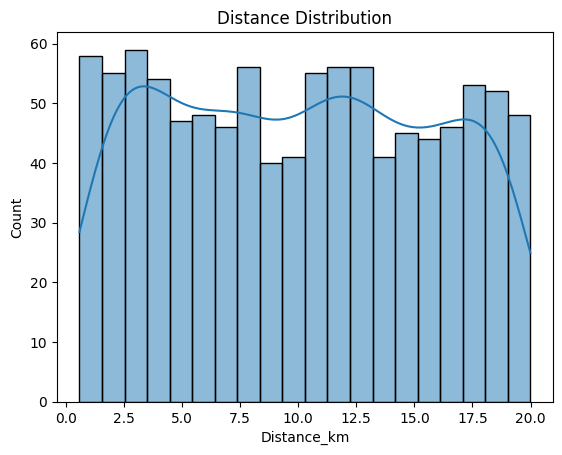

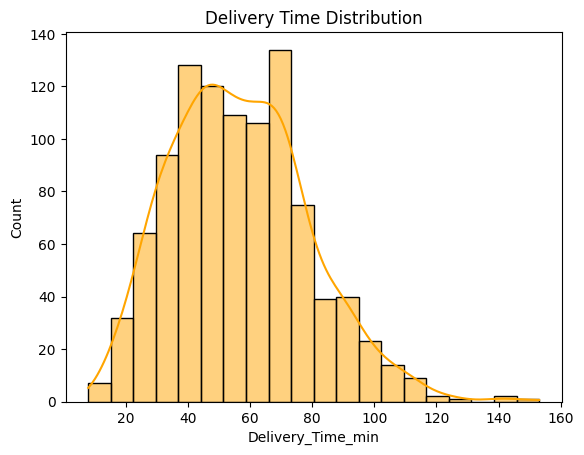

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.histplot(df['Distance_km'],bins=20, kde=True)
plt.title('Distance Distribution')
plt.show()

sns.histplot(df['Delivery_Time_min'], bins=20, kde=True, color='orange')
plt.title('Delivery Time Distribution')
plt.show()

In [2]:
# Fill categorical missing values with "Unknown"
df['Weather'] = df['Weather'].fillna('Unknown')
df['Traffic_Level'] = df['Traffic_Level'].fillna('Unknown')
df['Time_of_Day'] = df['Time_of_Day'].fillna('Unknown')

df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())

print(df.isnull().sum())


Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


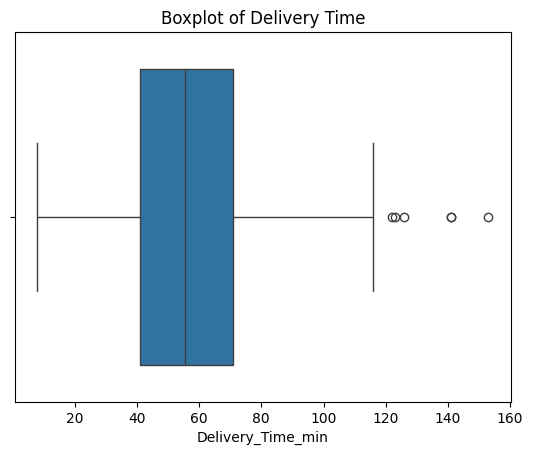

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['Delivery_Time_min'])
plt.title('Boxplot of Delivery Time')
plt.show()


In [5]:
# Define a reasonable cap (e.g., 99th percentile)
cap_value = df['Delivery_Time_min'].quantile(0.99)

# Replace extreme values with the cap
df['Delivery_Time_min'] = df['Delivery_Time_min'].clip(upper=cap_value)

print(f"Outliers capped at {cap_value} minutes")


Outliers capped at 113.0001 minutes


In [6]:
import os
os.makedirs("../data/processed", exist_ok=True)

# save cleaned file
clean_path = "../data/processed/Food_Delivery_Times_Cleaned.csv"
df.to_csv(clean_path, index=False)
print("Saved:", clean_path, "rows:", len(df))


Saved: ../data/processed/Food_Delivery_Times_Cleaned.csv rows: 1000
